<a href="https://colab.research.google.com/github/NatasaKinzy/Data-Science/blob/main/Unit6/Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

In [3]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
bikes = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/bikes.csv')

**Task1**:

Does elpd_loo mean anything if we only have one model?

Yes. It's an estimate of the model's accuracy. The larger the elpd_loo value, the better the prediction. The smaller the elpd_loo value, the worse the prediction.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when you add too many qualifications/conditions/priors/similar datasets to your model, making it overspecific and non-applicable in a general context.

**Task3**:

How do we mitigate overfitting?

We can use diverse data, ensure that we don't add too many uber-specific conditions to our model, use a large dataset so that it's not skewed any which way, and keep the model on the simpler side so as to not overcomplicate it and make it too specific.

**Task4**:

How do we mitigate underfitting?

Add a few parameters to the model, use a nonlinear model so that you can fit the data better, make sure that you have a fairly large dataset but that everything within that set is relavent to your model, try to make the data as clean as possible (you could omit outliers if you'd like but you also need to acknowledge that that may skew the model)

**Task5**:

Why would we want more than one predictor in a model?

Predictors are based on real life data but are usually based on data with only one variable, however, to make an accurate prediction you need to account for the complexities of real life and try to include the main variables there would be in real life. Including more predictors creates a more accurate and conditional model which is also helpful for trying to predict specific situations.

**Task6**:

Can we have too many predictors? How would we know?

You can have too many predictors and that would be when you have overfitted a model. It now only applies to VERY specific conditions and could be much less helpful in making predictions as life has more variablility than that model accounts for. You can test whether your model is overfitted by seeing how it preforms with new data. If it's still fairly accurate with a few new datasets than you should be fine but if it is no longer applicable to that data you have too many predictors. Basically if it starts preforming poorly and you know how to code than its likely that your model has too many predictors.

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process of answering "three" questions:
- do we need multiple predictors?
- how many?
- which ones? are some better than others?

The best way to determine and select your variables is to develop a causal diagram and see what variables have effects on your data. You then want to determine which are the most relavent to your data and select those as your predictors for your model.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

1. adding variables in model:
- assumes both categorical and continuous variables have the same affects on the model
- regressions are parallel with different intercepts

2. categorical variable as hierarchy above the other predictor variable:
- creates separate regressions for each category of the categorical model
- the intercepts and slopes of both curves varry as much as they'd like

3. adding variables and the categroical vairable's interaction with the other variable:
- tests whether the continuous varriable depends on the level of the categorical predictor
- curves have different slopes

2 and 3 look the same but use different processes to create the model

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We add different slopes and dimensions for each addition predictor. We can visualize a ML model if we have two continuous variables but anymore than that becomes impossible to model accurately.

This is how Mr. Arredondo visualized the Multiple Linear model:

In [ ]:
#mlb stands for multiple linear bikes
with pm.Model() as model_mlb:

    #priors on the linear part of the model
    α = pm.Normal("α", mu=0, sigma=1)
    β0 = pm.Normal("β0", mu=0, sigma=10)
    β1 = pm.Normal("β1", mu=0, sigma=10)

    #linear part of the model
    μ = pm.Deterministic("μ", pm.math.exp(α + β0 * bikes.temperature + β1 * bikes.hour))

    #prior for the standard deviation
    σ = pm.HalfNormal("σ", 10)

    #likelihood
    y = pm.NegativeBinomial("y", mu=μ, alpha=σ, observed=bikes.rented)

    #we need the log likelihood for model comparison later
    idata_mlb = pm.sample(idata_kwargs={"log_likelihood":True})

In [ ]:
pm.sample_posterior_predictive(idata_mlb, model = model_mlb, extend_inferencedata=True)

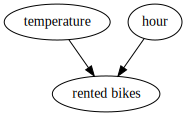

In [7]:
dag_b = gv.Digraph(comment='bikes_dag') #b for bikes

dag_b.node('R', 'rented bikes')
dag_b.node('T','temperature')
dag_b.node('H','hour')

dag_b.edges(['TR', 'HR',])

dag_b


<Axes: xlabel='y'>

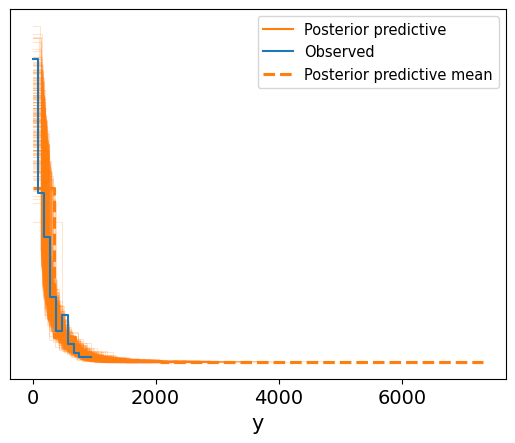

In [8]:
az.plot_ppc(idata_mlb, num_pp_samples=200, colors=["C1", "C0", "C1"])

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor) (1)
- predictors free throw percentage and position (with position as a hierarchy) (2)
- predictors free throw percentage and position (with position interacting with frew throw percentage) (3)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors (4)
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion. (5)

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [ ]:
!pip install bambi

In [19]:
#have to drop incomplete rows, so that bambi will run
basketball = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/basketball2324.csv').dropna()

In [15]:
import bambi as bmb

In [16]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

In [9]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [10]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [ ]:
#(1), define the model but categorical (+)
model_basketball = bmb.Model("`FG%` ~ `FT%` + Pos", data=basketball)
#fit the model
idata_1 = model_basketball.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
#(2) define the model, but as a hierarchy
model_basketball_h = bmb.Model("`FG%` ~ (`FT%`|Pos)", data=basketball)
#create the model
idata_2h = model_basketball_h.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
#(3), define the model but interacting (*)
model_basketball = bmb.Model("`FG%` ~ `FT%` * Pos", data=basketball)
#fit the model
idata_3 = model_basketball.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
#(4), define the model but interacting (*) and 3 point attempts
model_basketball = bmb.Model("`FG%` ~ `FT%` * Pos * '3PA'", data=basketball)
#fit the model
idata_4 = model_basketball.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
#(5), define the model but interacting (*) and 3 point attempts and only Pos and 3PA interact so they're separate
model_basketball = bmb.Model("`FG%` ~ `FT%` + Pos + '3PA' + '3PA'*Pos", data=basketball)
#fit the model
idata_5 = model_basketball.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
cmp_df = az.compare ({
    'Model 1': idata_1,
    'Model 2': idata_2h,
    'Model 3': idata_3,
    'Model 4': idata_4,
    'Model 5': idata_5
})




<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

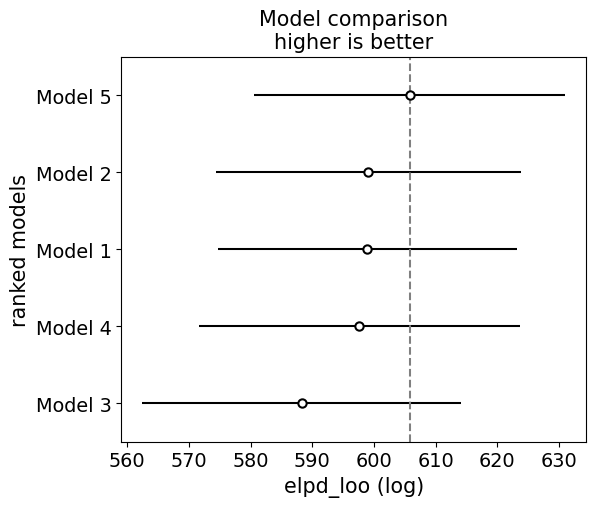

In [36]:
az.plot_compare(cmp_df)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

Definitely not the hierarchical model because it had 6 divergences. Model 5 is better because a higher elpd_loo value is best and Model 5 has the highest elpd_loo value.

It probably is the best because it takes into account all three variables while also having position and 3PA interact which likely specifies the model the most and leads to the most accurate model.

**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

In [ ]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [ ]:
body.head()

,siri,age,weight,height,abdomen,thigh,wrist
0,12.3,23,70.1,172,85.2,59.0,17.1
1,6.1,22,78.8,184,83.0,58.7,18.2
2,25.3,22,70.0,168,87.9,59.6,16.6
3,10.4,26,84.0,184,86.4,60.1,18.2
4,28.7,24,83.8,181,100.0,63.2,17.7


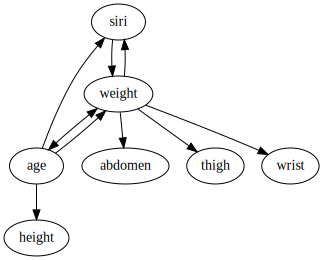

In [45]:
dag_bballi = gv.Digraph(comment='bball_dag') #bball interaction

dag_bballi.node('G', 'siri')
dag_bballi.node('T','age')
dag_bballi.node('P','weight')
dag_bballi.node('X','height')
dag_bballi.node('Y','abdomen')
dag_bballi.node('Z','thigh')
dag_bballi.node('K','wrist')

dag_bballi.edge('P', 'T', dir='both')
dag_bballi.edges(['TG','TX','TP', 'GP','PG','PY', 'PZ', 'PK'])

dag_bballi

I think it would make the most sense to predict age because age causes different siri, weight, and height and siri and weight lead to pretty much everything else; it all goes back to age.